In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_detached = "detached_apex.csv"

homes_data = pd.read_csv(file_detached)

In [2]:
homes_data.count()

MLS #                    5114
Status                   5114
Address                  5114
City                     5114
Zip                      5114
Closing Date             5114
Subdivision              5114
LvngAreaSF               5114
YrBlt                    5114
Beds                     5114
FBths                    5114
HBths                    5114
Property Type            5114
List Price               5114
Sold Price               5114
Days On Market           5114
HOA Y/N                  4571
Garage                   5114
Acres                    5114
Sold Price/List Price    5114
dtype: int64

In [3]:
homes_df = homes_data.copy()
homes_df = homes_df.rename(columns={"Sold Price": "SoldPrice"})
homes_df = homes_df.rename(columns={"List Price": "ListPrice"})

#remove $
homes_df['SoldPrice'] = homes_df.SoldPrice.str.lstrip('$')
homes_df['ListPrice'] = homes_df.ListPrice.str.lstrip('$')
#remove comma
homes_df['SoldPrice'] = homes_df['SoldPrice'].str.replace(',', '').astype(float)
homes_df['ListPrice'] = homes_df['ListPrice'].str.replace(',', '').astype(float)
homes_df['LvngAreaSF'] = homes_df['LvngAreaSF'].str.replace(',', '').astype(int)


In [4]:
homes_df = homes_df[homes_df.SoldPrice > 75000]
homes_df = homes_df[homes_df.SoldPrice < 800000]
homes_df


,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
2,2177583,CLOSED,5524 Bobbitt Road,Apex,27539,5/9/2018,Not in a Subdivision,1083,1953,2,1,0,Detached,75000.0,92000.0,2,No,0,.51-.75 Acres,1.23
3,2194561,CLOSED,106 N Bellhaven Drive,Apex,27539,7/6/2018,Not in a Subdivision,1344,1997,3,2,0,Detached,84500.0,100000.0,16,No,1,.26-.5 Acres,1.18
4,2197718,CLOSED,8325 Rhodes Road,Apex,27603,9/27/2018,Washington Homes,480,1960,2,1,0,Detached,109500.0,105000.0,49,NaN,0,1-2.9 Acres,0.96
5,2228236,CLOSED,304 S Hughes Street,Apex,27502,1/8/2019,Not in a Subdivision,964,1948,1,1,0,Detached,105000.0,105000.0,0,NaN,0,0-.25 Acres,1.00
6,2217507,CLOSED,2700 Optimist Farm Road,Apex,27539-8605,1/18/2019,Not in a Subdivision,1143,1910,2,1,0,Detached,125000.0,110000.0,38,No,0,1-2.9 Acres,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,2152422,CLOSED,1221 Lowland Street,Apex,27523,8/3/2020,Sweetwater,4653,2018,4,5,0,Detached,797500.0,797500.0,11,Yes,2,.26-.5 Acres,1.00
4908,2294624,CLOSED,1831 Old Evergreen Drive,Apex,27502,7/13/2020,Stillwater,3842,2020,4,4,1,Detached,799155.0,799155.0,0,Yes,3,.26-.5 Acres,1.00
4909,2190515,CLOSED,3138 Curling Creek Drive,Apex,27502,3/29/2019,Stillwater,4261,2018,5,5,1,Detached,799750.0,799750.0,0,Yes,3,.26-.5 Acres,1.00
4910,2149293,CLOSED,2080 Vandiver Way,Apex,27523,3/11/2019,Providence at Yates Pond,4373,2017,5,4,1,Detached,799900.0,799900.0,0,Yes,3,.26-.5 Acres,1.00


In [5]:
#randomize data frames
random_homes_df = homes_df.sample(frac=1)
random_homes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
473,2217106,CLOSED,1920 Kelly Road,Apex,27502,6/4/2019,Not in a Subdivision,2998,1836,3,3,0,Detached,319900.0,280000.0,195,No,0,.26-.5 Acres,0.88
643,2296872,CLOSED,207 Caristonia Way,Apex,27502,2/21/2020,Hollands Crossing,2008,1998,4,2,1,Detached,299900.0,297500.0,12,Yes,2,0-.25 Acres,0.99
4146,2246769,CLOSED,3604 Black Forest Drive,Apex,27539,5/17/2019,Fair Oaks,3886,2002,4,4,0,Detached,550000.0,570000.0,5,Yes,3,.51-.75 Acres,1.04
2391,2309886,CLOSED,2507 Flints Pond Circle,Apex,27523,5/15/2020,Walden Creek,2952,2001,5,2,1,Detached,419900.0,420000.0,2,Yes,2,.26-.5 Acres,1.00
2470,2216607,CLOSED,1004 S Wellonsburg Place,Apex,27502-8981,12/14/2018,Sterling at Buckingham,3002,1990,4,3,0,Detached,429900.0,425000.0,30,Yes,2,.26-.5 Acres,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2272418,CLOSED,306 Village Loop Drive,Apex,27502,10/21/2019,Green at Scotts Mill,2296,2003,3,2,1,Detached,379000.0,369000.0,35,Yes,2,0-.25 Acres,0.97
3769,2157126,CLOSED,1325 Gilwood Drive,Apex,27502,3/29/2018,Middleton,3550,2017,5,3,0,Detached,525500.0,525500.0,0,Yes,2,0-.25 Acres,1.00
1514,2332160,CLOSED,1003 Cuddington Court,Apex,27502,9/11/2020,Whitehall Manor,2228,2001,3,2,1,Detached,364900.0,366500.0,3,Yes,2,0-.25 Acres,1.00
679,2182142,CLOSED,4901 Ayden Mill Road,Apex,27539,5/24/2018,Sawyers Mill,2225,2001,4,2,1,Detached,300000.0,300000.0,15,Yes,2,0-.25 Acres,1.00


In [6]:
#copy df
house_data = random_homes_df
#copy Subdivision column data
house_data["Sub#"] = house_data["Subdivision"]


# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sub#'. 
house_data['Sub#']= label_encoder.fit_transform(house_data['Sub#'])
house_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,...,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price,Sub#
473,2217106,CLOSED,1920 Kelly Road,Apex,27502,6/4/2019,Not in a Subdivision,2998,1836,3,...,0,Detached,319900.0,280000.0,195,No,0,.26-.5 Acres,0.88,153
643,2296872,CLOSED,207 Caristonia Way,Apex,27502,2/21/2020,Hollands Crossing,2008,1998,4,...,1,Detached,299900.0,297500.0,12,Yes,2,0-.25 Acres,0.99,108
4146,2246769,CLOSED,3604 Black Forest Drive,Apex,27539,5/17/2019,Fair Oaks,3886,2002,4,...,0,Detached,550000.0,570000.0,5,Yes,3,.51-.75 Acres,1.04,72
2391,2309886,CLOSED,2507 Flints Pond Circle,Apex,27523,5/15/2020,Walden Creek,2952,2001,5,...,1,Detached,419900.0,420000.0,2,Yes,2,.26-.5 Acres,1.00,244
2470,2216607,CLOSED,1004 S Wellonsburg Place,Apex,27502-8981,12/14/2018,Sterling at Buckingham,3002,1990,4,...,0,Detached,429900.0,425000.0,30,Yes,2,.26-.5 Acres,0.99,209


In [7]:
#create subdivision dictionary
sub_dict = pd.Series(house_data["Sub#"].values,index=house_data['Subdivision']).to_dict()
sub_dict

{'Not in a Subdivision': 153,
 'Hollands Crossing': 108,
 'Fair Oaks': 72,
 'Walden Creek': 244,
 'Sterling at Buckingham': 209,
 'White Oak Creek': 260,
 'The Park at Langston': 231,
 'Langston': 132,
 'Bella Casa': 11,
 'Greenmoor': 86,
 'Kelly West': 125,
 'Scotts Mill': 196,
 'The Villages of Apex': 234,
 'Sweetwater': 227,
 'Salem Village': 187,
 'Parkside at Bella Casa': 164,
 'Stillwater': 210,
 'Green at Scotts Mill': 83,
 'Woodcreek': 270,
 'Brighton Forest': 21,
 'Woodbury': 269,
 'Smith Farm': 203,
 'Woodall Estates': 267,
 'Hallmark': 93,
 'Deerfield': 61,
 'Fairview Park': 74,
 'Darlington Woods': 57,
 'Haddon Hall': 91,
 'The Preserve at White Oak Creek': 232,
 'Reunion Pointe': 178,
 'Pearson Farms': 167,
 'McKenzie Ridge': 143,
 'Woodhall': 271,
 'The Park At West Lake': 230,
 'Senter Farm': 199,
 'Abbington': 1,
 'Colvin Park': 45,
 'Saddlebrook': 185,
 'Crestmont': 51,
 'Belmont': 14,
 'Buckhorn Preserve': 27,
 'Dogwood Ridge': 64,
 'Blaney Farms': 16,
 'Miramonte': 1

In [8]:
sub_dict.get("Jamison Park")

118

In [9]:
inputvalue = "Newbury Park"
sub_dict.get(inputvalue)

152

In [10]:
#homes model prep
X = house_data[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]]
y = house_data["SoldPrice"]
print(X.shape, y.shape)

(4910, 9) (4910,)


In [11]:
#normalize data
x_max = X.max()
x_min = X.min()
X = (X-X.min())/(X.max()-X.min())

y_min = y.min()
y_max = y.max()
y = (y-y.min())/(y.max()-y.min())


In [12]:
#unnormalize for final reports
y_inverse = y*(y_max-y_min)+y_min
y_inverse

473     280000.0
643     297500.0
4146    570000.0
2391    420000.0
2470    425000.0
          ...   
1555    369000.0
3769    525500.0
1514    366500.0
679     300000.0
2030    396342.0
Name: SoldPrice, Length: 4910, dtype: float64

In [13]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [15]:
house_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int32
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
Sub#                       int32
dtype: object

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=9))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [17]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
Sub#                     float64
dtype: object

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
3682/3682 - 8s - loss: 0.0705
Epoch 2/100
3682/3682 - 10s - loss: 0.0640
Epoch 3/100
3682/3682 - 8s - loss: 0.0622
Epoch 4/100
3682/3682 - 8s - loss: 0.0617
Epoch 5/100
3682/3682 - 9s - loss: 0.0604
Epoch 6/100
3682/3682 - 9s - loss: 0.0592
Epoch 7/100
3682/3682 - 9s - loss: 0.0587
Epoch 8/100
3682/3682 - 7s - loss: 0.0583
Epoch 9/100
3682/3682 - 7s - loss: 0.0582
Epoch 10/100
3682/3682 - 7s - loss: 0.0576
Epoch 11/100
3682/3682 - 7s - loss: 0.0567
Epoch 12/100
3682/3682 - 7s - loss: 0.0570
Epoch 13/100
3682/3682 - 6s - loss: 0.0567
Epoch 14/100
3682/3682 - 5s - loss: 0.0558
Epoch 15/100
3682/3682 - 5s - loss: 0.0559
Epoch 16/100
3682/3682 - 6s - loss: 0.0550
Epoch 17/100
3682/3682 - 5s - loss: 0.0565
Epoch 18/100
3682/3682 - 5s - loss: 0.0555
Epoch 19/100
3682/3682 - 5s - loss: 0.0557
Epoch 20/100
3682/3682 - 5s - loss: 0.0558
Epoch 21/100
3682/3682 - 5s - loss: 0.0552
Epoch 22/100
3682/3682 - 5s - loss: 0.0551
Epoch 23/100
3682/3682 - 5s - loss: 0.0551
Epoch 24/100
3682/3

In [20]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

39/39 - 0s - loss: 0.0555
Loss: 0.05550079420208931


In [21]:
predictions = model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.270803,
 0.35290852,
 0.43862203,
 0.43904626,
 0.6791174,
 0.37531656,
 0.59864783,
 0.48925465,
 0.4087925,
 0.3258148,
 0.6311587,
 0.3926029,
 0.25811264,
 1.0151898,
 0.8071016,
 0.5923709,
 0.8666693,
 0.4499601,
 0.35721374,
 0.9347476,
 0.58634925,
 0.7136915,
 0.49053228,
 0.37378234,
 0.37170246,
 0.51554745,
 0.7768276,
 0.4514565,
 0.67981243,
 0.5493609,
 0.448525,
 0.60582745,
 0.61828756,
 0.87047553,
 0.45195538,
 0.5995139,
 0.5155606,
 0.6202977,
 0.4729013,
 0.3656708,
 0.2504516,
 0.9265195,
 0.70728207,
 0.25075072,
 0.4110349,
 0.357895,
 0.5645733,
 0.31895313,
 0.6264862,
 0.25812197,
 0.3463839,
 0.45584884,
 0.61098063,
 0.49801883,
 0.4886015,
 0.38325647,
 0.7474441,
 0.5588496,
 0.21196142,
 0.45171127,
 0.60141194,
 0.7658217,
 0.5062254,
 0.36721706,
 0.26964054,
 0.59407586,
 0.56752026,
 0.36513048,
 0.5675007,
 0.54701227,
 1.032432,
 0.45155275,
 0.89278746,
 0.3678167,
 0.51923144,
 0.20109987,
 0.1978167,
 0.44514757,
 0.5577148,
 0.26407847,
 0.

In [22]:
actuals = y_test
len(actuals)

1228

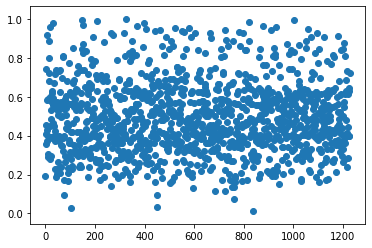

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,1228)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

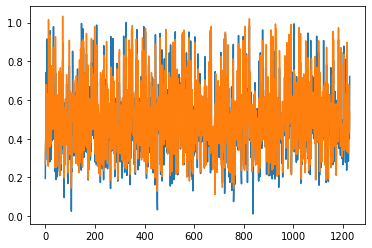

In [24]:
fig, ax = plt.subplots()
ax.plot(x_range,actuals)
ax.plot(x_range,predictions)


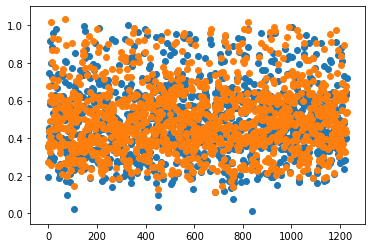

In [25]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)


In [26]:
#r2 and mse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f'Mean squared error: {mse.round(3)} \nr2: {r2.round(3)}')

Mean squared error: 0.006 
r2: 0.818


In [27]:
X_train

,YrBlt,Beds,FBths,LvngAreaSF,HBths,Days On Market,Garage,Sold Price/List Price,Sub#
4644,0.961957,0.500,0.500,0.577958,0.0,0.008596,0.500000,0.367647,0.039855
4116,0.994565,0.500,0.500,0.608769,0.2,0.000000,0.333333,0.367647,0.735507
3526,1.000000,0.250,0.375,0.356357,0.0,0.000000,0.333333,0.367647,0.829710
507,0.902174,0.375,0.250,0.213137,0.2,0.017192,0.333333,0.323529,0.793478
580,0.885870,0.250,0.250,0.227696,0.0,0.008596,0.333333,0.455882,0.307971
...,...,...,...,...,...,...,...,...,...
289,0.880435,0.250,0.250,0.162011,0.2,0.532951,0.333333,0.397059,0.391304
1799,0.885870,0.250,0.250,0.319451,0.0,0.002865,0.333333,0.367647,0.329710
1931,0.989130,0.375,0.375,0.314203,0.2,0.000000,0.333333,0.352941,0.597826
3452,0.983696,0.625,0.500,0.535466,0.0,0.630372,0.333333,0.367647,0.648551


In [28]:
#["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]
test_input = [1980, 4 , 3, 1500, 0, 10, 1, 1, 193]



#normalize inputs
test_input_normal = (test_input-x_min)/(x_max-x_min)
#convert to tf array
array = tf.reshape(test_input_normal, [-1,9])
print(array)
print('____________________')


#run model
output = model.predict(array)
print(output)
print('____________________')


#unnormalize for final reports
Normal_output = output*(y_max-y_min)+y_min
Normal_output

tf.Tensor(
[[0.7826087  0.375      0.375      0.17267649 0.         0.0286533
  0.16666667 0.36764706 0.69927536]], shape=(1, 9), dtype=float64)
____________________
[[0.24562863]]
____________________


array([[265880.5]], dtype=float32)

In [29]:
#save model
model.save("model.h5")